In [1]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from Histogram_generate import *

/home/shubham/Yoo/pythia8303/lib


In [2]:
outdir = 'images_out/'
if not os.path.isdir(outdir): os.system('mkdir {}'.format(outdir))
cwd = os.getcwd()

In [3]:
leading_jet = np.load(outdir+'tt_leading_jet.npz',allow_pickle=True)['arr_0']
all_jet = np.load(outdir+'tt_all_jets.npz',allow_pickle=True)['arr_0']
jetpep = np.load(outdir+'tt_jetpep.npz',allow_pickle=True)['arr_0']

In [4]:
leading_jet1 = np.load(outdir+'qcd_leading_jet.npz',allow_pickle=True)['arr_0']
all_jet1 = np.load(outdir+'qcd_all_jets.npz',allow_pickle=True)['arr_0']
jetpep1 = np.load(outdir+'qcd_jetpep.npz',allow_pickle=True)['arr_0']

In [5]:
def padd(image):

    max_size=[16,22]
    size = list(np.shape(image))
    #print(size)
    px, py = max_size[0]-size[0], max_size[1]-size[1]
    i=np.pad(image, (  (  int(np.floor(px/2)) , int(np.ceil(px/2))  )   , ( int(np.floor(py/2)) ,int(np.ceil(py/2)) )   ), 'constant')
    return i

def norm(histo, multi=255):
    
    return (histo/np.max(histo)*multi).astype(int)

In [6]:
std_jet1 = list(map(padd, leading_jet1))
std_jet = list(map(padd, leading_jet))

In [7]:
print(np.shape(std_jet1),np.shape(std_jet))

(35471, 16, 22) (36898, 16, 22)


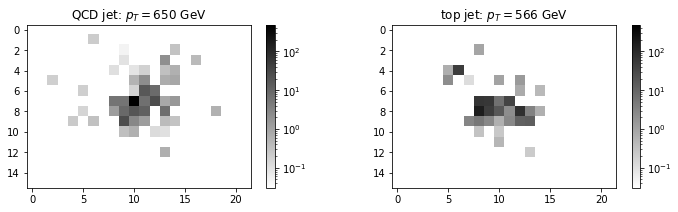

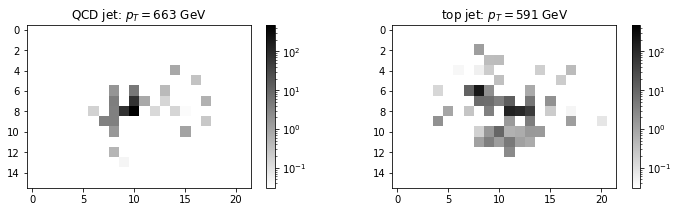

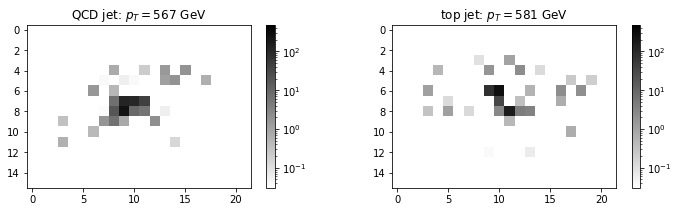

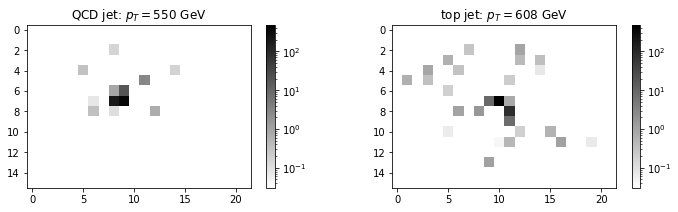

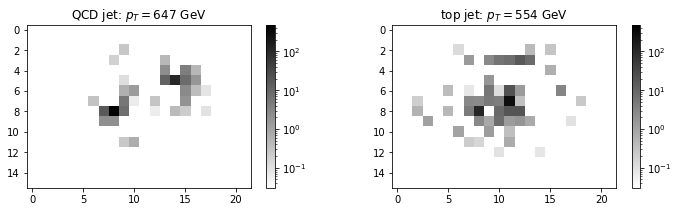

In [8]:
logscale = !True
logscale = dict(norm=mpl.colors.LogNorm()) if logscale else {}

for idx in range(5):
    fig, axes = plt.subplots(1,2, figsize=(12,3))
    for iax, ax in enumerate(axes):
        im = ax.imshow([std_jet1, std_jet][iax][idx], cmap=cmap, **logscale)
        plt.colorbar(im, ax=ax)

        ax.set(title='{} jet: $p_T=${:.0f} GeV'.format(['QCD','top'][iax], [jetpep1,jetpep][iax][idx][0][0]))

In [9]:

std_jet1 = list(map(norm, std_jet1))
std_jet = list(map(norm, std_jet))

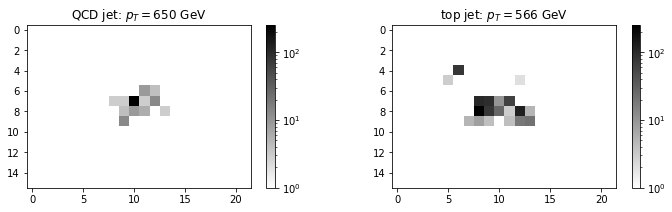

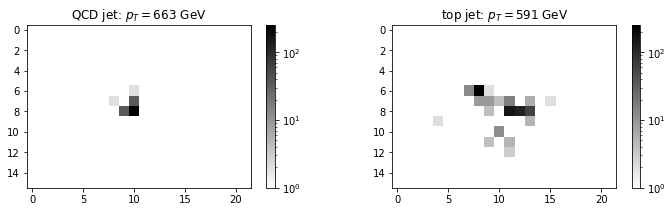

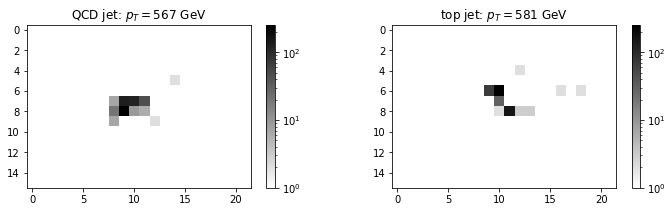

In [10]:
logscale = !True
logscale = dict(norm=mpl.colors.LogNorm()) if logscale else {}

for idx in range(3):
    fig, axes = plt.subplots(1,2, figsize=(12,3))    
    for iax, ax in enumerate(axes):
        im = ax.imshow([std_jet1, std_jet][iax][idx], cmap=cmap, **logscale)
        plt.colorbar(im, ax=ax)

        ax.set(title='{} jet: $p_T=${:.0f} GeV'.format(['QCD','top'][iax], [jetpep1,jetpep][iax][idx][0][0]))

In [5]:
all_jet=list(map(norm, all_jet))

In [8]:
all_jet1=list(map(norm, all_jet1))

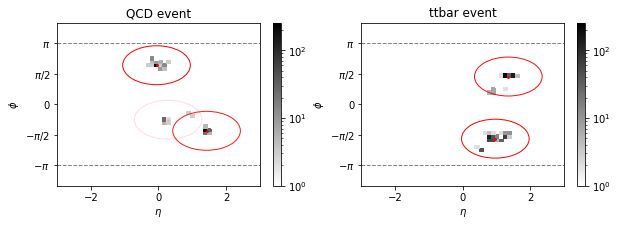

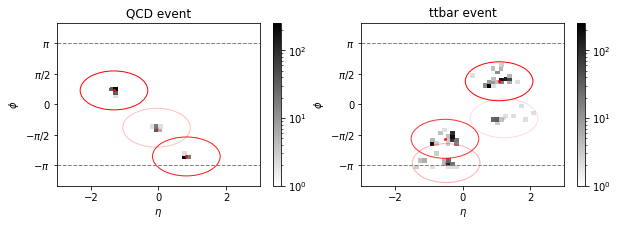

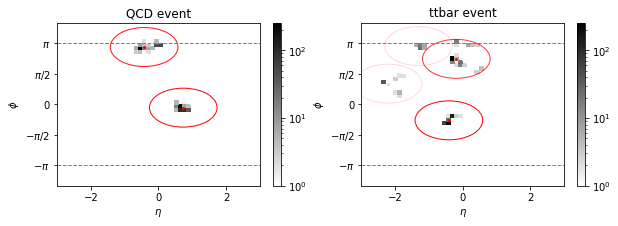

In [9]:
logscale = !True
logscale = dict(norm=mpl.colors.LogNorm()) if logscale else {}

for idx in range(3):
    fig, axes = plt.subplots(1,2, figsize=(10,3))    
    for iax, ax in enumerate(axes):
        im = ax.pcolor(etaedges, phiedges, sum([all_jet1, all_jet][iax][idx]), cmap=cmap, **logscale)
        plt.colorbar(im, ax=ax)
        jets = [jetpep1[idx], jetpep[idx]][iax]
        for j in jets:
            ax.add_artist(plt.Circle((j[1],j[2]),1, color='r', fill=False, alpha=j[0]/max([jj[0] for jj in jets])))
            ax.scatter(j[1],j[2], s=4, c='r', alpha=j[0]/max([jj[0] for jj in jets]))
        ax.set(title='{} event'.format(['QCD','ttbar'][iax]), xlabel='$\eta$', ylabel='$\phi$', yticks=np.linspace(-np.pi, np.pi,5), 
               yticklabels=['$-\pi$','$-\pi/2$',0,'$\pi/2$','$\pi$'])
        for h in [-np.pi, np.pi]: 
            ax.axhline(h, ls='--', lw=1, c='gray')

/tmp/ipykernel_24595/268713185.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ims[1]=axes[1].imshow(np.average(std_jet1, axis=0), vmax=150, norm=mpl.colors.LogNorm(),cmap=cmap)
/tmp/ipykernel_24595/268713185.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ims[3]=axes[3].imshow(np.average(std_jet, axis=0), vmax=150, norm=mpl.colors.LogNorm(),cmap=cmap)


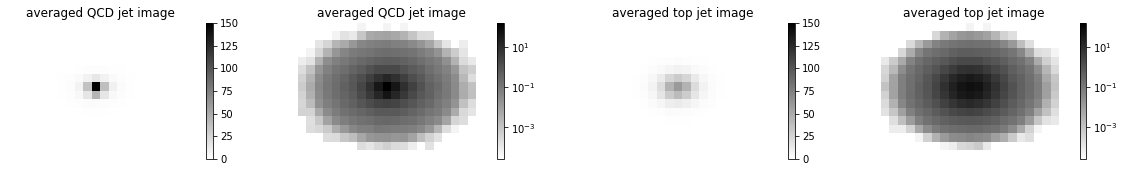

In [11]:
fig, axes = plt.subplots(1,4,figsize=(20,2.5))
ims = [0]*len(axes)
ims[0]=axes[0].imshow(np.average(std_jet1, axis=0), vmax=150,cmap=cmap)
ims[1]=axes[1].imshow(np.average(std_jet1, axis=0), vmax=150, norm=mpl.colors.LogNorm(),cmap=cmap)
ims[2]=axes[2].imshow(np.average(std_jet, axis=0), vmax=150,cmap=cmap)
ims[3]=axes[3].imshow(np.average(std_jet, axis=0), vmax=150, norm=mpl.colors.LogNorm(),cmap=cmap)

for iax, ax in enumerate(axes):
    plt.colorbar(ims[iax], ax=ax)
    ax.set_axis_off(); 
    ax.set(title='averaged {} jet image'.format(['QCD','top'][iax//2]))

In [27]:
import keras
data0 = np.load(outdir+'qcd_leading_jet.npz',allow_pickle=True)['arr_0']
data1 = np.load(outdir+'tt_leading_jet.npz',allow_pickle=True)['arr_0']

print('We have {} QCD jets and {} top jets'.format(len(data0), len(data1)))

x_data = np.concatenate((data0, data1))

x_data = list(map(padd, x_data))
x_data = list(map(norm   , x_data))

y_data = np.array([0]*len(data0)+[1]*len(data1))

np.random.seed(0) 
x_data, y_data = np.random.permutation(np.array([x_data, y_data]).T).T


x_data = np.stack(x_data)

#print(x_data.shape, y_data.shape)


x_data = x_data.reshape(x_data.shape + (1,)).astype('float32')
x_data /= 255.

y_data = keras.utils.np_utils.to_categorical(y_data, 2)

print(x_data.shape, y_data.shape)

n_train = 50000
(x_train, x_test) = x_data[:n_train], x_data[n_train:]
(y_train, y_test) = y_data[:n_train], y_data[n_train:]

print('We will train+validate on {0} images, leaving {1} for cross-validation'.format(n_train,len(x_data)-n_train))

We have 35471 QCD jets and 36898 top jets


/tmp/ipykernel_21326/2658123838.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_data, y_data = np.random.permutation(np.array([x_data, y_data]).T).T


(72369, 16, 22, 1) (72369, 2)
We will train+validate on 50000 images, leaving 22369 for cross-validation


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), input_shape=(16, 22, 1), activation='relu'))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(300, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = cnn.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=100, shuffle=True, verbose=1)

Epoch 1/50
400/400 [==============================] - 37s 90ms/step - loss: 0.4343 - accuracy: 0.8087 - val_loss: 0.3753 - val_accuracy: 0.8430
Epoch 2/50
400/400 [==============================] - 33s 82ms/step - loss: 0.3598 - accuracy: 0.8489 - val_loss: 0.3292 - val_accuracy: 0.8594
Epoch 3/50
400/400 [==============================] - 32s 79ms/step - loss: 0.3449 - accuracy: 0.8547 - val_loss: 0.3165 - val_accuracy: 0.8646
Epoch 4/50
400/400 [==============================] - 32s 80ms/step - loss: 0.3349 - accuracy: 0.8592 - val_loss: 0.3200 - val_accuracy: 0.8668
Epoch 5/50
400/400 [==============================] - 32s 81ms/step - loss: 0.3264 - accuracy: 0.8631 - val_loss: 0.3112 - val_accuracy: 0.8678
Epoch 6/50
400/400 [==============================] - 32s 81ms/step - loss: 0.3232 - accuracy: 0.8644 - val_loss: 0.3105 - val_accuracy: 0.8690
Epoch 7/50
400/400 [==============================] - 33s 82ms/step - loss: 0.3153 - accuracy: 0.8664 - val_loss: 0.3085 - val_accuracy:

In [ ]:
model_dir='model/'
if not os.path.isdir(model_dir): os.system('mkdir '+model_dir)
cnn.save(model_dir+'cnn.h5')
np.savez(model_dir+'training_histories.npz', [ history.history for history in [ history_cnn ]])


In [29]:
model_dir='model/'

history_cnn = np.load(model_dir+'training_histories.npz',allow_pickle=True)['arr_0']
cnn = keras.models.load_model(model_dir+'cnn.h5')

2022-03-24 01:19:26.869136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shubham/Yoo/root/lib/:
2022-03-24 01:19:26.883405: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 01:19:26.883475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ShubhamUbuntu): /proc/driver/nvidia/version does not exist
2022-03-24 01:19:26.918428: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
predictions_cnn = cnn.predict(x_test)

2022-03-24 01:19:33.489102: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [17]:
#print(history_cnn)
#print(predictions_cnn,y_test)

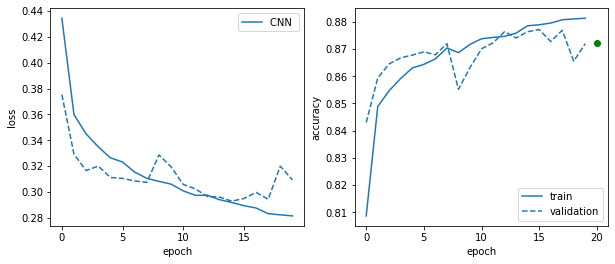

In [18]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

nn=20

axes[1].scatter(nn, 1.*sum(np.argmax(predictions_cnn, axis=1) == np.argmax(y_test, axis=1))/ len(y_test),c='g')
for i, history in enumerate(history_cnn):
    axes[1].plot(history['accuracy'][:nn], c=plt.get_cmap("tab10")(i), label='train')
    axes[1].plot(history['val_accuracy'][:nn], c=plt.get_cmap("tab10")(i), ls ='--', label='validation')
    axes[0].plot(history['loss'][:nn], c=plt.get_cmap("tab10")(i), label=['CNN '][i])
    axes[0].plot(history['val_loss'][:nn], c=plt.get_cmap("tab10")(i), ls='--')
for iax in range(2):
    axes[iax].set(xlabel='epoch', ylabel=['loss','accuracy'][iax])
axes[0].legend()
axes[1].legend()


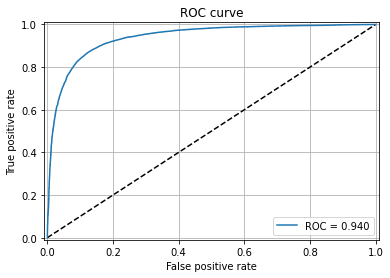

In [32]:
from sklearn.metrics import roc_curve

fpr_cnn, tpr_cnn, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())

from sklearn.metrics import auc

auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_cnn, tpr_cnn, label='ROC = {:.3f}'.format(auc_cnn))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')


/tmp/ipykernel_68440/1085593263.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_cnn, 1/fpr_cnn, label='Convolutional NN (area = {:.3f})'.format(auc2))


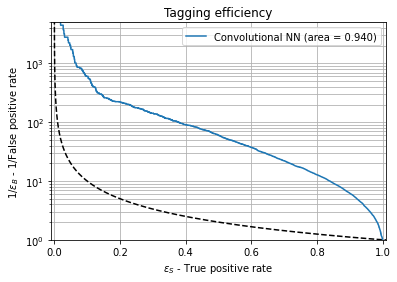

In [20]:

plt.plot(thresholds, 1/thresholds, 'k--')

plt.plot(tpr_cnn, 1/fpr_cnn, label='Convolutional NN (area = {:.3f})'.format(auc2))
plt.gca().set(ylabel='1/$\epsilon_B$ - 1/False positive rate', xlabel='$\epsilon_S$ - True positive rate', title='Tagging efficiency', xlim=(-0.01,1.01), ylim=(1,5*10**3), yscale='log')
plt.grid(True, which="both")
plt.legend(loc='upper right')


/tmp/ipykernel_68440/140315338.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = axes[i].imshow(x_test[(predictions_cnn).argmax(axis=1)[i]], vmax=1, cmap=cmap, **logscale)
/tmp/ipykernel_68440/140315338.py:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  axes[2].imshow(x_test[abs(predictions_cnn-0.5).argmin(axis=0)[0],:,:,0], vmax=1, cmap=cmap, **logscale)


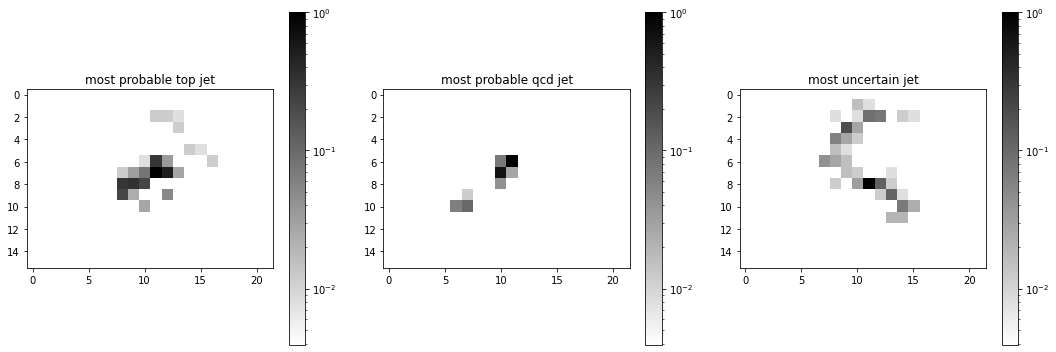

In [27]:
logscale = True
logscale = dict(norm=mpl.colors.LogNorm()) if logscale else {}

fig, axes = plt.subplots(1,3,figsize=(15,5))
for i in range(2):
    im = axes[i].imshow(x_test[(predictions_cnn).argmax(axis=1)[i]], vmax=1, cmap=cmap, **logscale)
    plt.colorbar(im, ax=axes[i])
    axes[i].set(title='most probable {} jet'.format(['top','qcd'][i]))
axes[2].imshow(x_test[abs(predictions_cnn-0.5).argmin(axis=0)[0],:,:,0], vmax=1, cmap=cmap, **logscale)
plt.colorbar(im, ax=axes[2])
axes[2].set(title='most uncertain jet')

fig.tight_layout()


In [7]:
import keras
data0 = np.load(outdir+'qcd_leading_jet.npz',allow_pickle=True)['arr_0']
data1 = np.load(outdir+'tt_leading_jet.npz',allow_pickle=True)['arr_0']

print('We have {} QCD jets and {} top jets'.format(len(data0), len(data1)))

X_data = np.concatenate((data0, data1))

X_data = list(map(padd, X_data))
X_data = list(map(norm   , X_data))

Y_data = np.array([0]*len(data0)+[1]*len(data1))
X_data=np.array(X_data)

np.random.seed(0) 
p = np.random.permutation(len(X_data))
X_data=X_data[p]
Y_data=Y_data[p]

#print(X_data,Y_data)

print(X_data.shape, Y_data.shape)

We have 35471 QCD jets and 36898 top jets
(72369, 16, 22) (72369,)


In [8]:
X__data=[]
for i in range(len(X_data)):
    X__data.append(X_data[i].ravel())
X__data=np.array(X__data)
print(X__data.shape, Y_data.shape)

n_train = 50000
(X_train, X_test) = X__data[:n_train], X__data[n_train:]
(Y_train, Y_test) = Y_data[:n_train], Y_data[n_train:]

print('We will train+validate on {0} images, leaving {1} for cross-validation'.format(n_train,len(X_data)-n_train))

(72369, 352) (72369,)
We will train+validate on 50000 images, leaving 22369 for cross-validation


In [85]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=1,)
DT.fit(X_train,Y_train)

import joblib

model_dir='model/'
joblib.dump(DT,model_dir+'DT.pkl')

['model/DT.pkl']

In [9]:
import joblib
model_dir='model/'
DT=joblib.load(model_dir+'DT.pkl')
predictions_DT=DT.predict(X_test)

#print(predictions_DT,Y_test)

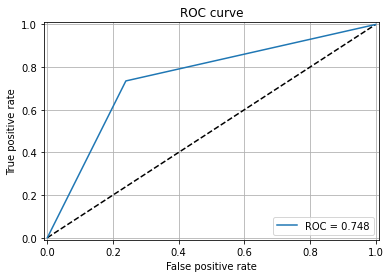

In [10]:
from sklearn.metrics import roc_curve

fpr_DT, tpr_DT, thresholds = roc_curve(Y_test.ravel(), predictions_DT.ravel())

from sklearn.metrics import auc

auc_DT = auc(fpr_DT, tpr_DT)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_DT, tpr_DT, label='ROC = {:.3f}'.format(auc_DT))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')


In [89]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT=GradientBoostingClassifier(learning_rate=0.2,n_estimators=500,random_state=1)

GBDT.fit(X_train,Y_train)

model_dir='model/'
joblib.dump(GBDT,model_dir+'GBDT.pkl')

['model/GBDT.pkl']

In [11]:
GBDT=joblib.load(model_dir+'GBDT.pkl')
predictions_GBDT=GBDT.predict(X_test)

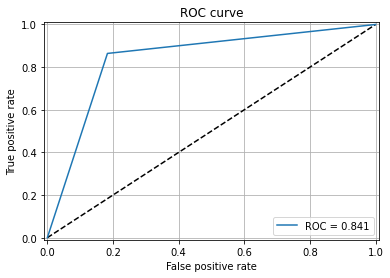

In [12]:

fpr_GBDT, tpr_GBDT, thresholds = roc_curve(Y_test.ravel(), predictions_GBDT.ravel())


auc_GBDT = auc(fpr_GBDT, tpr_GBDT)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_GBDT, tpr_GBDT, label='ROC = {:.3f}'.format(auc_GBDT))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=500,criterion='gini',random_state=1)
RF.fit(X_train,Y_train)

model_dir='model/'
joblib.dump(RF,model_dir+'RF.pkl')

['model/RF.pkl']

In [13]:
RF=joblib.load(model_dir+'RF.pkl')
predictions_RF=RF.predict(X_test)

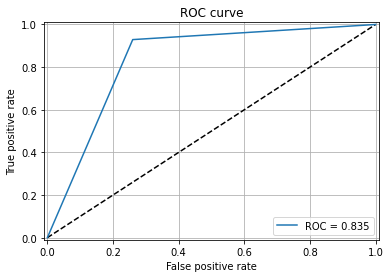

In [14]:

fpr_RF, tpr_RF, thresholds = roc_curve(Y_test.ravel(), predictions_RF.ravel())


auc_RF = auc(fpr_RF, tpr_RF)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_RF, tpr_RF, label='ROC = {:.3f}'.format(auc_RF))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')

In [24]:
from sklearn.ensemble import AdaBoostClassifier

AdaB=AdaBoostClassifier(n_estimators=500,learning_rate=0.2,random_state=1)
AdaB.fit(X_train,Y_train)

joblib.dump(AdaB,model_dir+'AdaB.pkl')

['model/AdaB.pkl']

In [15]:
AdaB=joblib.load(model_dir+'AdaB.pkl')
predictions_AdaB=AdaB.predict(X_test)

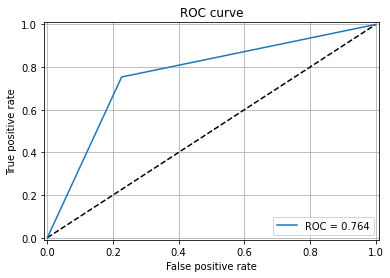

In [16]:
fpr_AdaB, tpr_AdaB, thresholds = roc_curve(Y_test.ravel(), predictions_AdaB.ravel())


auc_AdaB = auc(fpr_AdaB, tpr_AdaB)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_AdaB, tpr_AdaB, label='ROC = {:.3f}'.format(auc_AdaB))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=8,weights='distance')
KNN.fit(X_train,Y_train)

joblib.dump(KNN,model_dir+'KNN.pkl')

['model/KNN.pkl']

In [18]:
KNN=joblib.load(model_dir+'KNN.pkl')
predictions_KNN=KNN.predict(X_test)

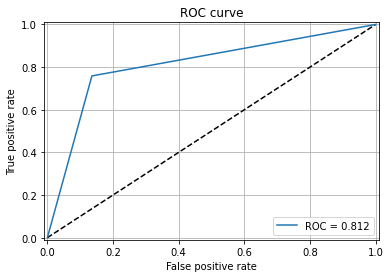

In [22]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(Y_test.ravel(), predictions_KNN.ravel())


auc_KNN = auc(fpr_KNN, tpr_KNN)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_KNN, tpr_KNN, label='ROC = {:.3f}'.format(auc_KNN))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')

In [23]:
import xgboost

XGB=xgboost.XGBClassifier(learning_rate=0.2,n_estimators=500,random_state=1)
XGB.fit(X_train,Y_train)

joblib.dump(XGB,model_dir+'XGB.pkl')

/home/shubham/Yoo/virt/lions/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:11:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['model/XGB.pkl']

In [24]:
XGB=joblib.load(model_dir+'XGB.pkl')
predictions_XGB=XGB.predict(X_test)

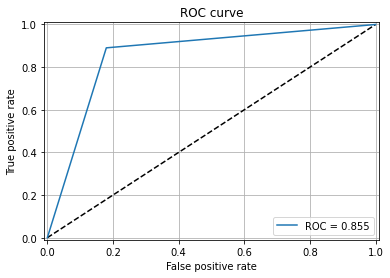

In [25]:
fpr_XGB, tpr_XGB, thresholds = roc_curve(Y_test.ravel(), predictions_XGB.ravel())

auc_XGB = auc(fpr_XGB, tpr_XGB)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_XGB, tpr_XGB, label='ROC = {:.3f}'.format(auc_XGB))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')

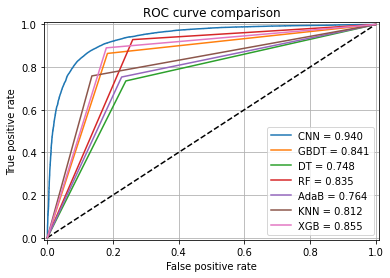

In [36]:
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_cnn, tpr_cnn, label='CNN = {:.3f}'.format(auc_cnn))
plt.plot(fpr_GBDT, tpr_GBDT, label='GBDT = {:.3f}'.format(auc_GBDT))
plt.plot(fpr_DT, tpr_DT, label='DT = {:.3f}'.format(auc_DT))
plt.plot(fpr_RF, tpr_RF, label='RF = {:.3f}'.format(auc_RF))
plt.plot(fpr_AdaB, tpr_AdaB, label='AdaB = {:.3f}'.format(auc_AdaB))
plt.plot(fpr_KNN, tpr_KNN, label='KNN = {:.3f}'.format(auc_KNN))
plt.plot(fpr_XGB, tpr_XGB, label='XGB = {:.3f}'.format(auc_XGB))

plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve comparison', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right')